# HW6
If you are familiar with python, you can use your own command line to finish your homework!!


### In ipynb, if starting with exclamation mark (!), which means the command is executed in shell.

## Let's download the homework file to colab!!
Press the run button, and you will download HW6!!
### This command will only need to be executed once!!

In [0]:
!git init
!git remote add origin https://github.com/LinearAlgebraLee/HW6.git
!git pull
!git checkout master

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.
From https://github.com/LinearAlgebraLee/HW6
 * [new branch]      master     -> origin/master
There is no tracking information for the current branch.
Please specify which branch you want to merge with.
See git-pull(1) for details.

    git pull <remote> <branch>

If you wish to set tracking information for this branch you can do so with:

    git branch --set-upstream-to=origin/<branch> master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Already on 'master'


# What you should do!
After downloading the files, you should go to modify **todo.py** to finsh your homework.

### Package
* PIL
* numpy
* matplotlib

Already installed in colab. You may need to intall them by yourself if you're using your own command line.

You can install them by:

    $ pip install pillow
    $ pip install numpy
    $ pip install matplotlib

# Must Run

After finishing the **todo.py**, run the following command to get the answer.

You should only run the command!  You should not modify the code in main.py and util.py, or else you will not the credits.


In [31]:
!python main.py

Perform SVD for k=1 ...
Perform SVD for k=5 ...
Perform SVD for k=50 ...
Perform SVD for k=150 ...
Perform SVD for k=400 ...
Perform SVD for k=600 ...
Perform SVD for k=800 ...
Perform SVD for k=1050 ...
Perform SVD for k=1200 ...


The following is playground for you to debug, you can play around to test out your code!!
# VERY IMPORTANT for ipynb
if you modify functions in python code! If you have imported to the ipynb, you should close out the notebook and rerun to import your modified functions.

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from todo import svd_compress

img_path = 'img/vegetable_english.jpg'
#img_path = 'img/LinusTorvalds.jpg'
imArr = load_image(img_path)

ks = [1, 5, 50, 150, 400, 1050, 1200]
err = []
for k in ks: 
    print("Perform SVD for k=%d ..." % k)
    imArr_compressed = svd_compress(imArr, K=k)
    err += [approx_error(imArr, imArr_compressed)]
    save_image(imArr_compressed, 'result_{}.jpg'.format(k))

Perform SVD for k=1 ...
Perform SVD for k=5 ...
Perform SVD for k=50 ...
Perform SVD for k=150 ...
Perform SVD for k=400 ...
Perform SVD for k=1050 ...
Perform SVD for k=1289 ...


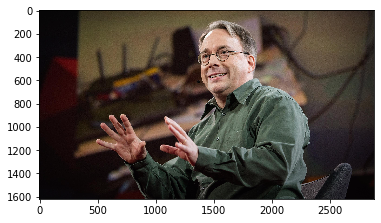

In [0]:
plt.imshow(imArr_compressed)
plt.show()

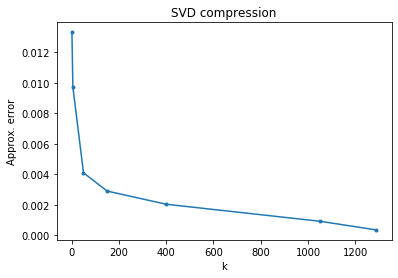

In [0]:
plot_curve(ks, err, show=True)

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from todo import svd_compress

imArr = load_image('img/vegetable_english.jpg')

In [0]:
imArr_compressed = svd_compress(imArr, K=518)
err = approx_error(imArr[:,:,0],imArr_compressed[:,:,0])
print(err)

0.009973106073954003


In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from todo import svd_compress

imArr = load_image('img/vegetable_english.jpg')

imArr_compressed = np.zeros(imArr.shape)
imArr_compressed_A = [0,0,0,0,0]
# For each channel
u, sigma, v_trans = np.linalg.svd(imArr[:, :, 1])
for i in range(5):
  imArr_compressed_A[i] = sigma[i] * np.matmul(u[:,i].reshape(2285,1),v_trans[i,:].reshape(1,1200))
  imArr_compressed[:, :, 1] += sigma[i] * np.matmul(u[:,i].reshape(2285,1),v_trans[i,:].reshape(1,1200))
        
# Make imArr_compressed range from 0 to 255
imArr_compressed[:, :, 1] -= imArr_compressed[:, :, 1].min()
imArr_compressed[:, :, 1] /= imArr_compressed[:, :, 1].max()
imArr_compressed[:, :, 1] *= 255

for i in range(len(imArr_compressed_A)):
  imArr_compressed_A[i] -= imArr_compressed_A[i].min()
  imArr_compressed_A[i] /= imArr_compressed_A[i].max()
  imArr_compressed_A[i] *= 255

save_image(imArr_compressed.astype(np.uint8), 'result.jpg')
save_image(imArr_compressed_A[0].astype(np.uint8), 'result_A1.jpg')
save_image(imArr_compressed_A[1].astype(np.uint8), 'result_A2.jpg')
save_image(imArr_compressed_A[2].astype(np.uint8), 'result_A3.jpg')
save_image(imArr_compressed_A[3].astype(np.uint8), 'result_A4.jpg')
save_image(imArr_compressed_A[4].astype(np.uint8), 'result_A5.jpg')
